<a href="https://colab.research.google.com/github/aidsdarshana/Car_Prediction_Workshop_Casestudy_Physics_Wallah/blob/main/Copy_of_Car_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Title**:The ABCs of Machine Learning: A Beginner's Handbook
### **Program**: Workshop

### **Platform**: Physics Wallah

### **Case Study**: Cardekho Car Prediction

### **Date**: 25/01/2025

## **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

## **IMPORT DATASET**

In [ ]:
data=pd.read_csv('/content/Cardekho (1).csv')

In [ ]:
print(data)

              car_name     brand     model  vehicle_age  km_driven  \
0          Maruti Alto    Maruti      Alto            9     120000   
1        Hyundai Grand   Hyundai     Grand            5      20000   
2          Hyundai i20   Hyundai       i20           11      60000   
3          Maruti Alto    Maruti      Alto            9      37000   
4        Ford Ecosport      Ford  Ecosport            6      30000   
...                ...       ...       ...          ...        ...   
15406      Hyundai i10   Hyundai       i10            9      10723   
15407    Maruti Ertiga    Maruti    Ertiga            2      18000   
15408      Skoda Rapid     Skoda     Rapid            6      67000   
15409  Mahindra XUV500  Mahindra    XUV500            5    3800000   
15410       Honda City     Honda      City            2      13000   

      seller_type fuel_type transmission_type  mileage  engine  max_power  \
0      Individual    Petrol            Manual    19.70     796      46.30   
1    

## **DATA INFORMATION**

In [ ]:
data.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [ ]:
data.shape

(15411, 13)

In [ ]:
data.ndim

2

In [ ]:
data.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [ ]:
data.nunique()

,0
car_name,121
brand,32
model,120
vehicle_age,24
km_driven,3688
seller_type,3
fuel_type,5
transmission_type,2
mileage,411
engine,110


## **DATA PREPROCESSING**

In [ ]:
print(data.isnull().sum())

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64


## **DATA FIELD RELATIONSHIP UNDERSTANDING BY VISUALIZATION**

Here the Mileage and Engine are the important parameters to predict the price of the car

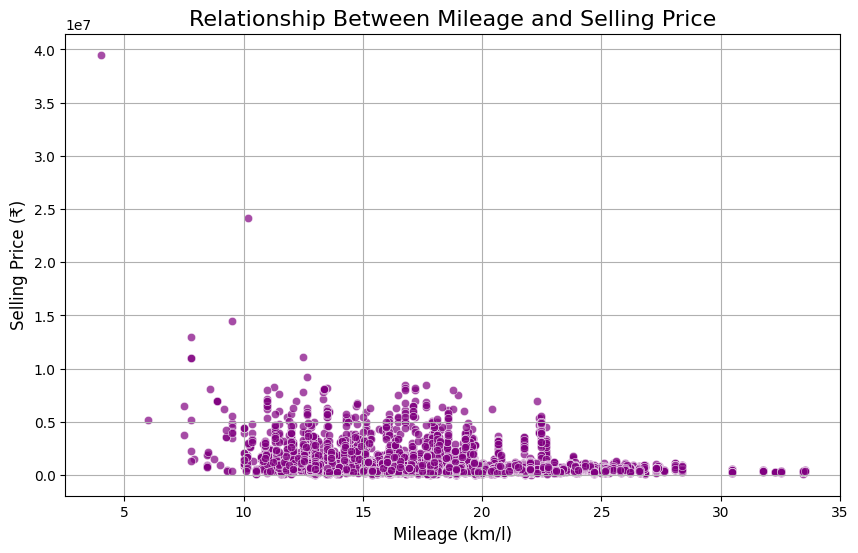

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['mileage'], y=data['selling_price'], color='purple', alpha=0.7)
plt.title("Relationship Between Mileage and Selling Price", fontsize=16)
plt.xlabel("Mileage (km/l)", fontsize=12)
plt.ylabel("Selling Price (₹)", fontsize=12)
plt.grid(True)
plt.show()

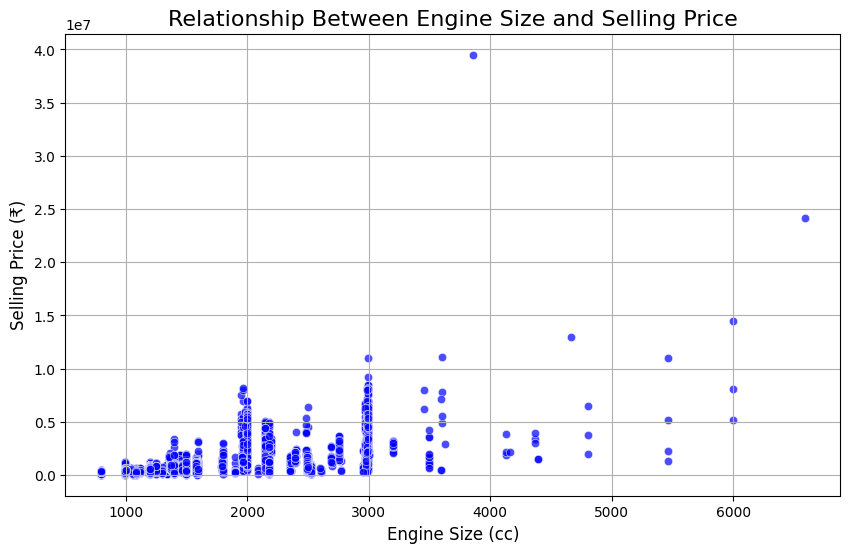

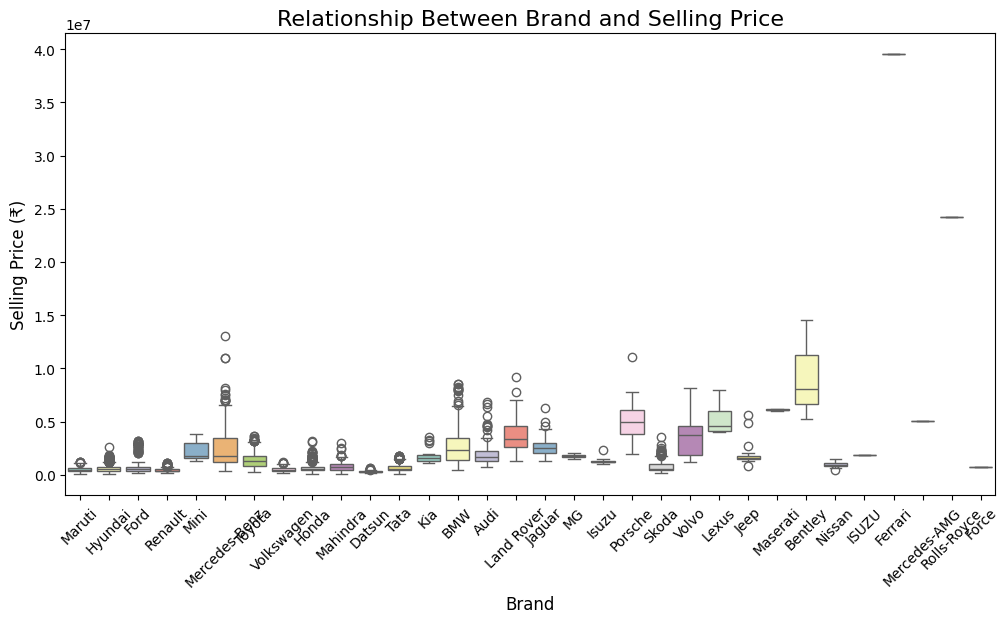

In [ ]:
# 1. Relationship Between Engine Size and Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['engine'], y=data['selling_price'], color='blue', alpha=0.7)
plt.title("Relationship Between Engine Size and Selling Price", fontsize=16)
plt.xlabel("Engine Size (cc)", fontsize=12)
plt.ylabel("Selling Price (₹)", fontsize=12)
plt.grid(True)
plt.show()

# 2. Relationship Between Brand and Selling Price
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['brand'], y=data['selling_price'], palette='Set3')
plt.title("Relationship Between Brand and Selling Price", fontsize=16)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Selling Price (₹)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

## **SPLITING OF DATASET**

In [ ]:
data = pd.get_dummies(data, columns=['transmission_type'])
features = ['vehicle_age', 'km_driven', 'transmission_type_Automatic', 'transmission_type_Manual', 'mileage', 'engine', 'max_power', 'seats']
target = 'selling_price'
X = data[features]
y = data[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **MODEL BUILDING**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nModel Performance:\nMean Squared Error: {mse:.2f}\nR-Squared: {r2:.2f}")

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
print(coefficients)


Model Performance:
Mean Squared Error: 253077232536.71
R-Squared: 0.66

Model Coefficients:
                       Feature   Coefficient
0                  vehicle_age -60388.275620
1                    km_driven     -1.164884
2  transmission_type_Automatic  56544.415989
3     transmission_type_Manual -56544.415989
4                      mileage  16634.837707
5                       engine    110.796534
6                    max_power  14930.310644
7                        seats  13508.514138


## **EVALUVATION**

In [ ]:
new_car = np.array([[3, 20000, 1, 1, 20, 1500, 100, 5]])  # Example input
predicted_price = model.predict(new_car)
print(f"\nPredicted Price for New Car: {predicted_price[0]:.2f}")


Predicted Price for New Car: 1025890.08
